In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as colors
from matplotlib import cm
mpl.rcParams['figure.dpi']= 80 # reducing resolution of ipynb inline graph
%matplotlib widget

In [23]:
# datafile = 'mcp-run22/run22.csv'
# datafile = 'run50.csv'
datafile = 'run64.csv'
# datafile = 'run58.csv'
filename_raw = "plots/raw.pdf"
filename_all = "plots/all.pdf"
filename_dT= "plots/2DdT.pdf"
filename_dT_zoom= "plots/2DdT_zoom.pdf"
filename_tsumZ = "plots/Tsum_zoom.pdf"
df = pd.read_csv(datafile,skiprows=[1,2]) # pandas dataframe
df

,#,Header,Format,20020003,Unnamed: 4,X1,Unnamed: 6,Unnamed: 7,X2,Unnamed: 9,Unnamed: 10,Y1,Unnamed: 12,Unnamed: 13,Y2,Unnamed: 15
0,[00][00],6915095092,249,:,[00][01],77.844,186,[00][02],79.594,194,[00][03],65.719,159.0,[00][04],86.157,134.0
1,[00][00],29141107139,373,:,[00][01],124.172,345,[00][02],31.861,384,[00][03],120.485,347.0,[00][04],29.953,332.0
2,[00][00],37077136889,416,:,[00][01],150.641,436,[00][02],6.860,491,[00][03],75.016,441.0,[00][04],75.266,464.0
3,[00][00],61477147311,350,:,[00][01],77.781,262,[00][02],79.313,303,[00][03],65.719,256.0,[00][04],86.000,248.0
4,[00][00],79350884936,197,:,[00][01],75.750,156,[00][02],81.500,116,[00][03],71.500,80.0,[00][04],80.125,148.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315939,[00][00],6727966500513000,458,:,[00][01],77.499,364,[00][02],79.124,388,[00][03],65.374,353.0,[00][04],85.874,354.0
315940,[00][00],6728011392719560,974,:,[00][01],90.031,905,[00][02],66.250,912,[00][03],96.875,835.0,[00][04],52.281,866.0
315941,[00][00],6728013556526840,383,:,[00][01],77.750,237,[00][02],79.250,295,[00][03],66.063,254.0,[00][04],85.219,264.0
315942,[00][00],6728020230340560,494,:,[00][01],43.220,496,[00][02],113.781,488,[00][03],116.125,435.0,[00][04],33.906,421.0


In [16]:
# # importing data
# dat_X = [df['X1'], df['X2']]
# dat_Y = [df['Y1'], df['Y2']]

# dat_compact = [df['sig_x_21'].notna('True'), df['sig_y_21']]

# df2 = df.loc[df['sig_x_21'].isnull()==False]

# dat_compact=[df2['sig_x_21'],df2['sig_y_21']]


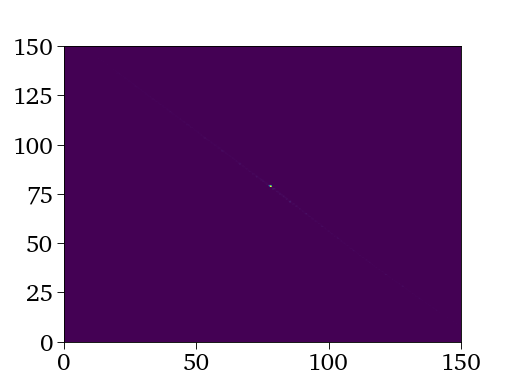

In [17]:
x1_bins = np.linspace(0, 150, 500)
x2_bins = np.linspace(0, 150, 500)
plt.hist2d(df['X1'],df['X2'],bins=[x1_bins,x2_bins])
plt.show()


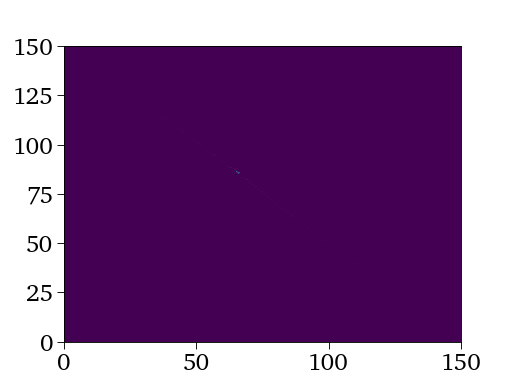

In [18]:
y1_bins = np.linspace(0, 150, 1000)
y2_bins = np.linspace(0, 150, 1000)
plt.hist2d(df['Y1'],df['Y2'],bins=[y1_bins,y2_bins])
plt.show()

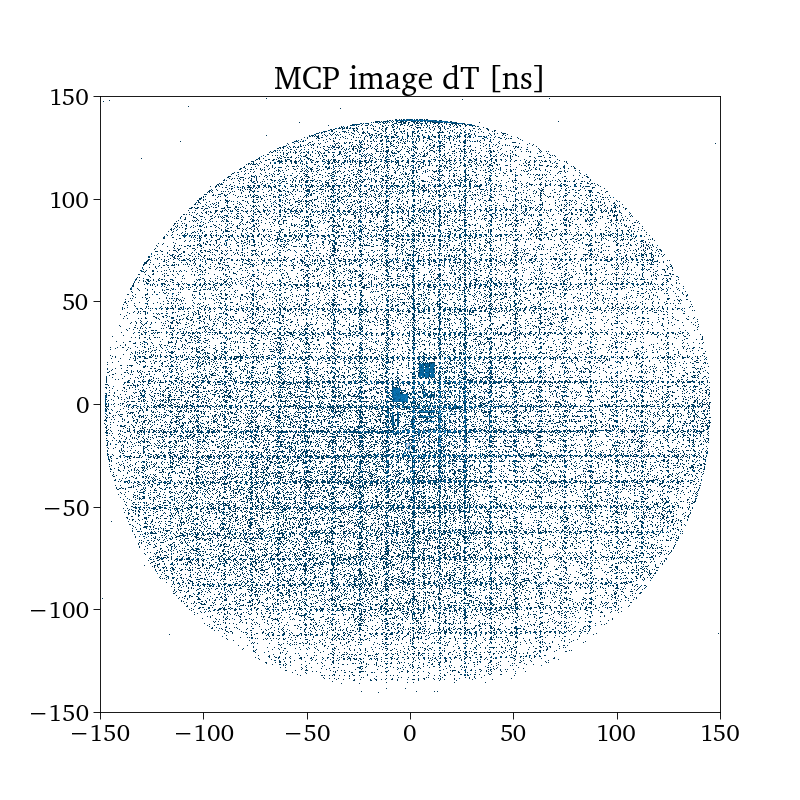

In [19]:
plt.figure(figsize=(10,10)) 
x_bins = np.linspace(-150, 150, 1000)
y_bins = np.linspace(-150, 150, 1000)
plt.hist2d(df['X1']-df['X2'],df['Y1']-df['Y2'],bins=[x_bins,y_bins],norm=colors.LogNorm(), 
        #    interpolation='nearest', 
           cmap='PuBu_r')
plt.title('MCP image dT [ns]')
plt.savefig(f'{filename_dT}',bbox_inches='tight')
# plt.show()

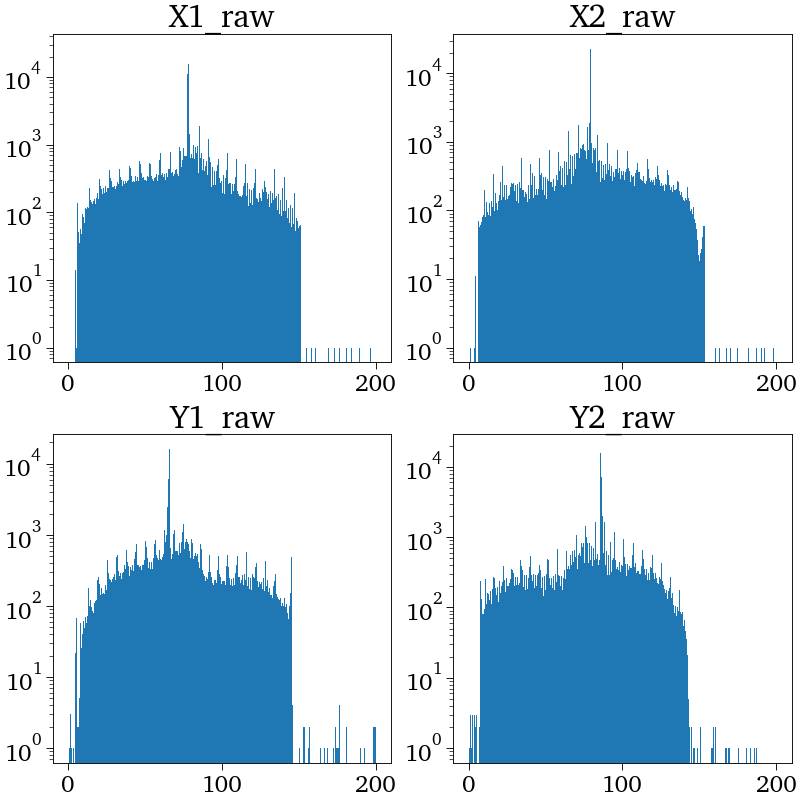

In [20]:
plt.style.use('pub_line.mplstyle')

f,a = plt.subplots(2, 2, figsize = (10, 10),
                       constrained_layout=True)

a[0, 0].hist(df['X1'], bins = 1000,range=(0,200))
a[0, 0].set_title('X1_raw')
a[0, 0].semilogy()
# ax.set_xlabel(xaxes[idx])
# ax.set_ylabel(yaxes[idx])
a[0, 1].hist(df['X2'], bins = 1000,range=(0,200))
a[0, 1].set_title('X2_raw')
a[0, 1].semilogy()

a[1, 0].hist(df['Y1'], bins = 1000,range=(0,200))
a[1, 0].set_title('Y1_raw')
a[1, 0].semilogy()

a[1, 1].hist(df['Y2'], bins = 1000,range=(0,200))
a[1, 1].set_title('Y2_raw')
a[1, 1].semilogy()

# plt.show()
plt.savefig(f'{filename_raw}',bbox_inches='tight')


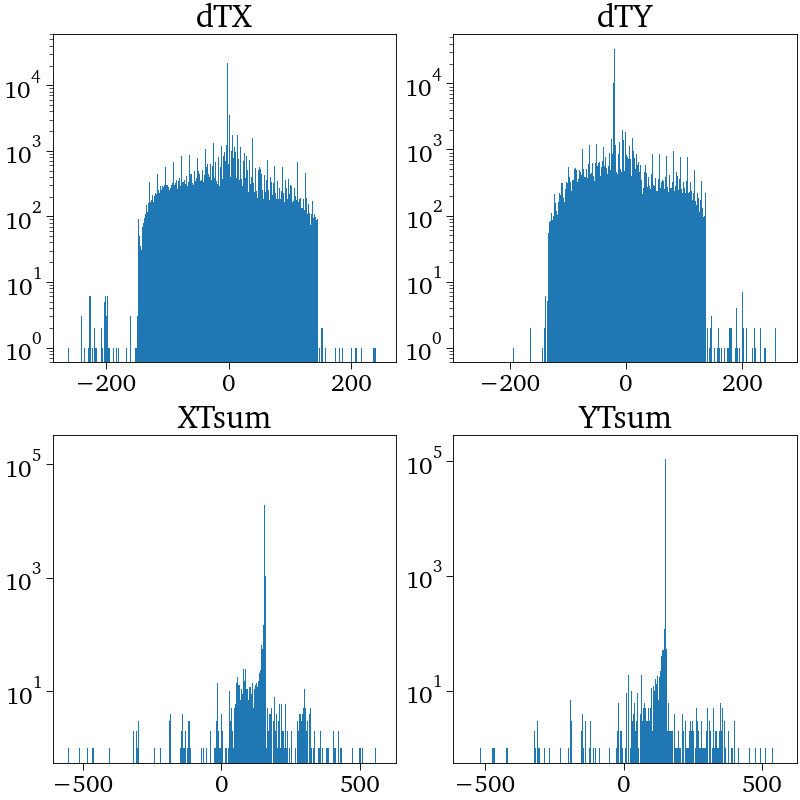

In [21]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('pub_line.mplstyle')

f,b = plt.subplots(2, 2, figsize = (10, 10),
                       constrained_layout=True)


b[0, 0].hist(df['X1']-df['X2'], bins = 1000)
b[0, 0].set_title('dTX')
b[0, 0].semilogy()
b[0, 1].hist(df['Y1']-df['Y2'], bins = 1000)
b[0, 1].set_title('dTY')
b[0, 1].semilogy()

b[1, 0].hist(df['X1']+df['X2'], bins = 1000)
b[1, 0].set_title('XTsum')
b[1, 0].semilogy()
b[1, 1].hist(df['Y1']+df['Y2'], bins = 1000)
b[1, 1].set_title('YTsum')
b[1, 1].semilogy()
plt.show()
# plt.savefig(f'{filename_all}',bbox_inches='tight')
# plt.savefig('{plots/tsumzoom.pdf}',bbox_inches='tight')

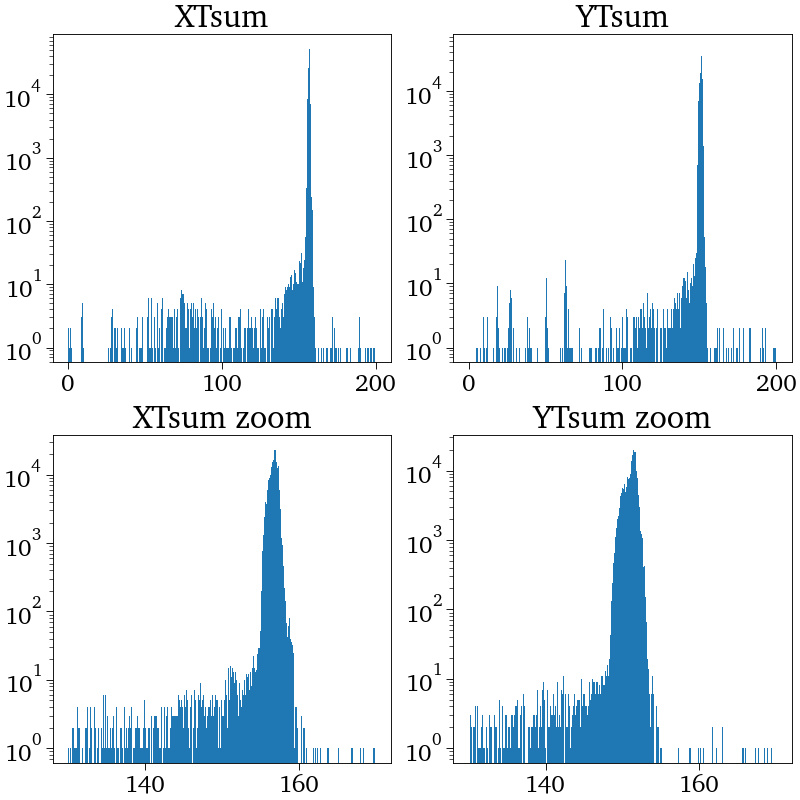

In [22]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('pub_line.mplstyle')

f,b = plt.subplots(2, 2, figsize = (10, 10),
                       constrained_layout=True)



b[0, 0].hist(df['X1']+df['X2'], bins = 1000,range=(0,200))
b[0, 0].set_title('XTsum')
b[0, 0].semilogy()
b[0, 1].hist(df['Y1']+df['Y2'], bins = 1000, range=(0,200))
b[0, 1].set_title('YTsum')
b[0, 1].semilogy()

b[1, 0].hist(df['X1']+df['X2'], bins = 500,range=(130,170))
b[1, 0].set_title('XTsum zoom')
b[1, 0].semilogy()
b[1, 1].hist(df['Y1']+df['Y2'], bins = 500, range=(130,170))
b[1, 1].set_title('YTsum zoom')
b[1, 1].semilogy()
# plt.show()
# plt.savefig(f'{filename_all}',bbox_inches='tight')
plt.savefig(f'{filename_tsumZ}',bbox_inches='tight')